# Gradient Boosting Using Happy Planet Index Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import seaborn as sns
sns.set()
sns.set_context("talk")


In [2]:
happy_planet=pd.read_excel('hpi-data-2016.xlsx',sheet_name=4)
happy_planet=happy_planet[0:140]
del happy_planet['Unnamed: 0']
happy_planet=happy_planet.sort_values(by=['Country'])
happy_planet = happy_planet.replace('Data unavailable', np.nan)
happy_planet.head()

med = np.median(happy_planet['Happy Planet Index'])

#upper = happy_planet.loc[happy_planet['Happy Planet Index']>=med]
#lower = happy_planet.loc[happy_planet['Happy Planet Index']<med]

# median of col a and col b is calculated and save in another column
happy_planet['median_a'] = happy_planet['Happy Planet Index'].median()
happy_planet['median_b'] = happy_planet['GINI index'].median()

# if col a value is greater than median_a then a_bool contains True else False
happy_planet['median_bool_a']  = happy_planet.apply(lambda  x: 1 if x['Happy Planet Index']>=x['median_a'] else 0 ,axis=1)
happy_planet['median_bool_b']  = happy_planet.apply(lambda  x: 1 if x['GINI index']>=x['median_b'] else 0 ,axis=1)


#Evaluation for using median
#Compare to random forest - time taken, complexity
#Extra layer of decision trees


dataset = happy_planet
countries=list(dataset['Country'])
dataset

,HPI Rank,Country,Region,Average Life \nExpectancy,Average Wellbeing\n(0-10),Happy Life Years,Footprint\n(gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita\n($PPP),Population,GINI index,median_a,median_b,median_bool_a,median_bool_b
0,110.0,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803.0,NaN,26.290152,35.15,0,0
1,13.0,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489.0,28.96,26.290152,35.15,1,0
2,30.0,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427.0,NaN,26.290152,35.15,1,0
3,19.0,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224.0,42.49,26.290152,35.15,1,1
4,73.0,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339.0,30.48,26.290152,35.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,29.0,Venezuela,Americas,73.885,7.1,41.494509,3.57,0.189280,65.453733,6.497572,33.569960,12771.595036,29854238.0,NaN,26.290152,35.15,1,0
136,5.0,Vietnam,Asia Pacific,75.477,5.5,32.770246,1.65,0.185921,64.794265,5.215639,40.307589,1754.547974,88809200.0,38.70,26.290152,35.15,1,1
137,94.0,Yemen,Middle East and North Africa,63.340,4.1,15.204282,1.03,0.387313,44.721219,3.557846,22.754269,1289.034078,24882792.0,NaN,26.290152,35.15,0,0
138,77.0,Zambia,Sub Saharan Africa,58.409,5.0,16.674248,0.99,0.408122,38.674163,4.469524,25.224246,1686.618024,14786581.0,NaN,26.290152,35.15,0,0


In [3]:
#Select only the 2016 data to merge with Happy Planet Index
#Can we somehow merge this column onto the dataset where missing countries are NaN?
politics = pd.read_csv('PoliticalGenderBalanceDataset.csv')
politics = politics[politics.index % 2 == 0]
politics=politics.iloc[:,[0,22]]
politics = politics.rename(columns={'Country Name':'Country'})
politics=politics.loc[politics['Country'].isin(countries)]

#politics.mask(politics['Country'].isin(countries))
#ind=list(politics.index)
#for i in range(140):
#    if i not in ind:

politics

,Country,2016
0,Afghanistan,27.7
2,Albania,22.9
4,Algeria,31.6
8,Argentina,35.8
10,Armenia,10.7
...,...,...
296,Vanuatu,0.0
298,Venezuela,14.4
300,Vietnam,26.7
302,Zambia,18.0


In [4]:
dataset = pd.get_dummies(dataset, columns=["median_bool_a"])
dataset.fillna(value=0.0, inplace=True)

X=dataset.iloc[:,[3,4,5,6,7,8,9,10,17,18]]
Y=dataset['median_bool_b']
Y

0      0
1      0
2      0
3      1
4      0
      ..
135    0
136    1
137    0
138    0
139    0
Name: median_bool_b, Length: 140, dtype: int64

In [5]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
#X_train, X_test = train_test_split(dataset, test_size=0.33, random_state=7)
y_train

8      0
86     0
108    0
137    0
82     0
      ..
23     0
92     0
103    0
67     1
25     0
Name: median_bool_b, Length: 93, dtype: int64

In [6]:
X_train=X_train.values
X_test=X_test.values
#Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Set a seed and select the percentage of data for testing on
state = 12  
test_size = 0.30 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

X_train

array([[0.58360551, 0.37162162, 0.27424659, 0.0834977 , 0.48887331,
        0.53152941, 0.35192485, 0.4945189 , 0.        , 1.        ],
       [0.31263852, 0.18918919, 0.06805013, 0.01183432, 0.82594029,
        0.20707661, 0.18631143, 0.26798866, 1.        , 0.        ],
       [0.35183133, 0.4527027 , 0.1944529 , 0.08941486, 0.71624439,
        0.2801735 , 0.41854784, 0.3115002 , 1.        , 0.        ],
       [0.90064738, 0.93918919, 0.90248369, 0.32215648, 0.05998467,
        0.92825503, 0.92709672, 0.71584452, 0.        , 1.        ],
       [0.53429371, 0.35135135, 0.2279447 , 0.03616042, 0.58156406,
        0.44699044, 0.33360698, 0.59001698, 0.        , 1.        ],
       [0.15671294, 0.43243243, 0.1201166 , 0.01709402, 0.82686482,
        0.13565971, 0.40052949, 0.39323595, 1.        , 0.        ],
       [0.        , 0.41216216, 0.0870772 , 0.06903353, 0.81559917,
        0.0983985 , 0.35328259, 0.13989091, 1.        , 0.        ],
       [0.78228158, 0.47297297, 0.4599287

In [7]:

#Set different learning rates to compare performance of classifier at different rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))


Learning rate:  0.05
Accuracy score (training): 0.862
Accuracy score (validation): 0.607
Learning rate:  0.075
Accuracy score (training): 0.877
Accuracy score (validation): 0.607
Learning rate:  0.1
Accuracy score (training): 0.923
Accuracy score (validation): 0.607
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.571
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.607
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.571
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.679


In [8]:
#Evaluate the classifier by checking its accuracy and creating a confusion matrix
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[15  2]
 [ 9  2]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        17
           1       0.50      0.18      0.27        11

   micro avg       0.61      0.61      0.61        28
   macro avg       0.56      0.53      0.50        28
weighted avg       0.58      0.61      0.55        28



In [9]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_val, clf.predict(X_val))
print("MSE: %.4f" % mse)

MSE: 0.3587


Text(0,0.5,'Deviance')

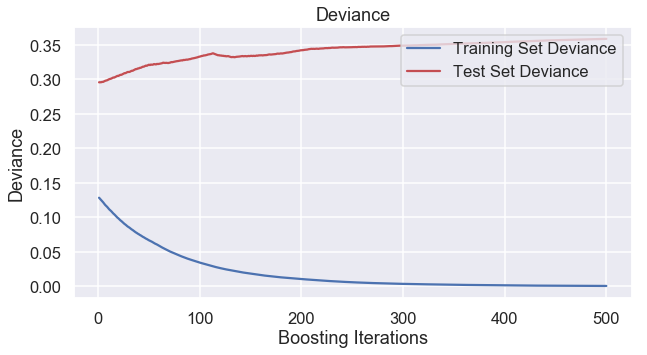

In [10]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_val)):
    test_score[i] = clf.loss_(y_val, y_pred)

plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

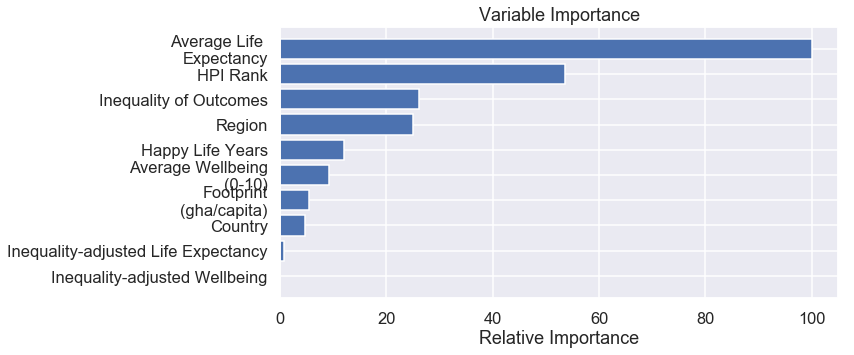

In [11]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10, 5))

#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
features=dataset.columns
plt.yticks(pos, features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()